#Linear Regression Class

In [1]:
import numpy as np


class LinearRegression:
    # y = weight * X + bias

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr # learning rate
        self.n_iters = n_iters # number of iteration
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))  # T is used to Transpose X
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

#How to Train data

Mean Squared Error: 326.70
R² Score: 0.95


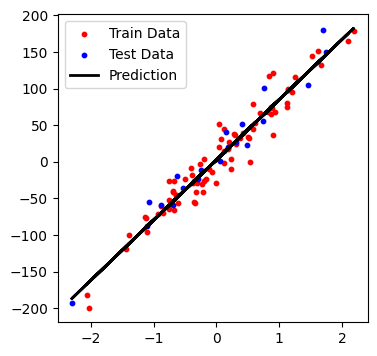

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Generate synthetic regression data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train model
reg = LinearRegression(lr=0.01, n_iters=1000)
reg.fit(X_train, y_train)

# Predictions
predictions = reg.predict(X_test)

# Evaluation
mse = np.mean((y_test - predictions) ** 2)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot results
plt.figure(figsize=(4,4))
plt.scatter(X_train, y_train, color="red", s=10, label="Train Data")
plt.scatter(X_test, y_test, color="blue", s=10, label="Test Data")
plt.plot(X, reg.predict(X), color="black", linewidth=2, label="Prediction")
plt.legend()
plt.show()